<a href="https://colab.research.google.com/github/Nimrod2022/ML-wine-quality-project/blob/main/Wine_Quality_ML_Project_KIBET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Wine Quality Classification using Machine Learning and Deep Learning Models**

## **Introduction**

 Machine learning techniques present an opportunity to objectively classify wines based on their quality. The project aims to develop models that can classify wines as either low or high quality, based on features and characteristics of the wine. Two datasets related to red and white variants of the Portuguese “Vinho Verde” wine were utilized. The selected models included Random Forest Classification and Artifical Neural Network.




#### Pipeline structure


![Pipeline structure](https://drive.google.com/uc?export=view&id=1givgw5IqHbYHU0bkOgBI41Nnjwe164ja)


### **Loading the Datasets**

Given that there are two datasets (red and white wines), the first steps are importing relevant modules and load the datasets, create dataframes, and combine them into one dataframe.

In [ ]:
#Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the red wine dataset

import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=1t_lZ6J94o_6gZ4cQq4xdL5nj4cuGVrxn'
df1 = pd.read_csv(url, delimiter=";")

#Add Wine type column to dataset with 0 for red wine
df1["wine_type"] = [int(x) for x in np.zeros(len(df1)).tolist()]

df1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [ ]:
#Load the white wine dataset

url2 = 'https://drive.google.com/uc?export=download&id=1G5Nbp5me6EQ_U0DLQthoyI9n-uUlXS-_'
df2 = pd.read_csv(url2, delimiter=";")

#Add Wine type column to dataset with 1 for white wine
df2["wine_type"] = [int(x) for x in np.ones(len(df2)).tolist()]

df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
#Join both dataframes into one
df = pd.concat([df1, df2])

# Reset the index
df.reset_index(drop=True, inplace=True)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


### **Exploratory Data Analysis**

Goals:
*  Gain insights into the dataset's structure and attributes.
*  Generate descriptive statistics for numerical columns within the DataFrame.
*  Inspecting the dataset for the presence of missing or null values, which can adversely affect the integrity and reliability of the analysis.
*  Visualizing feature distribution using a histogram
*  Correlation matrix

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


The summary provides an overview of the dataset’s central tendencies, variability, and distribution:

* Count: 6497 instances for each attribute.

* Mean: Reflects the average value for each attribute.

* Standard Deviation (Std): Indicates the extent of dispersion from the mean.

* Minimum (Min): The lowest value recorded for each attribute.

* 25th Percentile (25%): The value below which 25% of the data falls.

* Median (50%): Represents the middle value of the dataset.

* 75th Percentile (75%): The value below which 75% of the data falls.

In [ ]:
#Check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

### **Histogram Visualization**
A histogram provides a graphic representation of data to find useful information. It reveals how the dataset is distributed across the features.

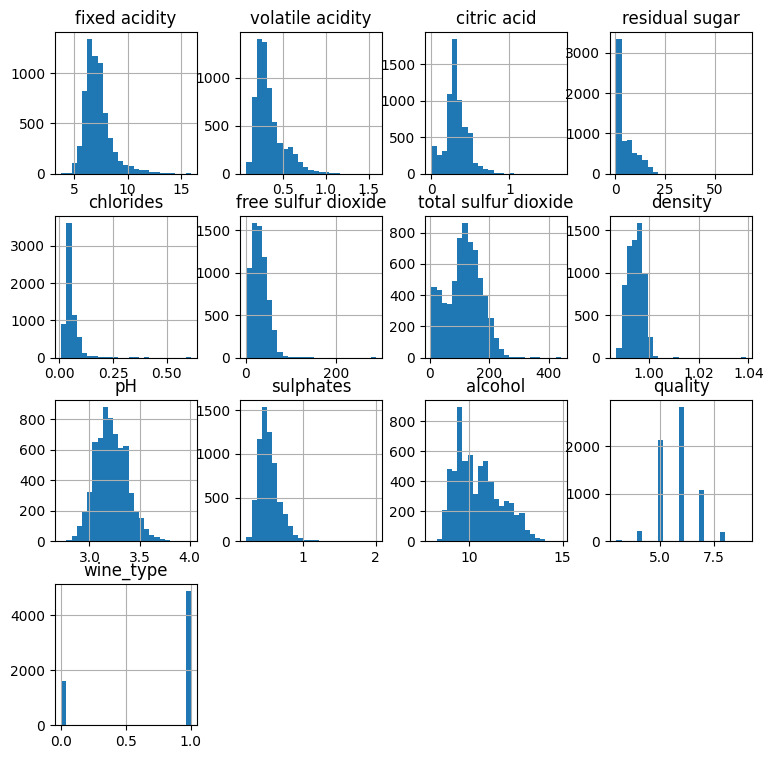

In [ ]:
#Histogram
df.hist(bins=25,figsize=(9,9))

plt.show()

### **Correlation**
A correlation matrix was used to infer the types of relations between the 11 features. The focus was on the relationship between different features and the quality label.

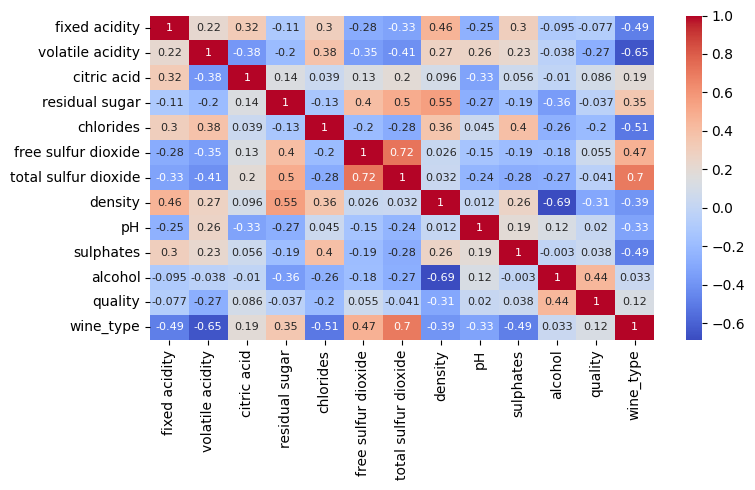

In [ ]:
# Correlation matrix

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", annot_kws={"fontsize": 8})
plt.tight_layout()
plt.show()

Most of the features have weak relationships based on the correlation matrix. Alcohol had the highest correlation (0.44) with quality. It indicates that it plays a significant role in determining the quality of wine compared to other features.

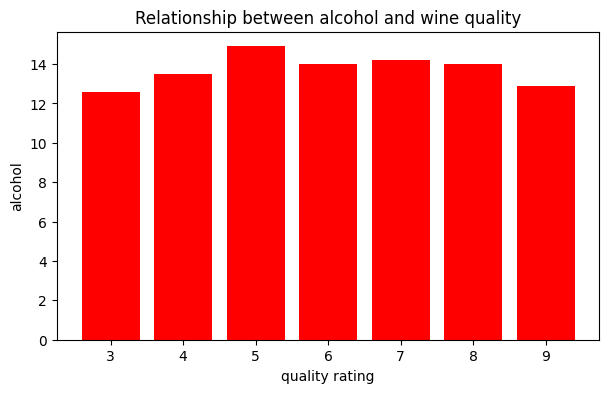

In [ ]:
# bar graph to show relationship between alcohol level and wine quality
plt.figure(figsize=[7,4])
plt.bar(df['quality'],df['alcohol'],color='red')

plt.title('Relationship between alcohol and wine quality')
plt.xlabel('quality rating')
plt.ylabel('alcohol')

plt.show()

## **Quality Mapping and Label Binarization**

**Wine quality distribution across classes**

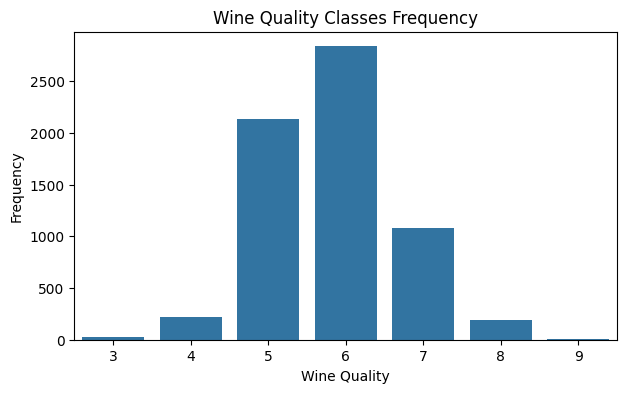

In [ ]:
# Wine quality classes frequancy
plt.figure(figsize=(7, 4))
sns.countplot(x=df['quality'])

plt.title('Wine Quality Classes Frequency')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')

plt.show()

The bar chart present a clear and concise view of how wine quality is distributed across different categories. The visual conveys the prevalence of “Low” and “High” quality wines, offering an initial grasp of how our dataset’s quality spectrum is composed. Given that a binary label was required for this project, it was appropriate to set a score of higher or above 7 as the high quality wine, while scores of less than 7 were categorized as low quality wine.

**Quality mapping**

In [ ]:
df_new = df.copy()

In [ ]:
# Quality Mapping: Assigns qualitative labels ("Low" or "High") based on numerical scores
quaity_mapping = {
    3 : "Low",
    4 : "Low",
    5: "Low",
    6 : "Low",
    7: "High",
    8 : "High",
    9 : "High"
  }

df_new["quality"] =  df_new["quality"].map(quaity_mapping)

In [ ]:
df_new.quality.value_counts()

Low     5220
High    1277
Name: quality, dtype: int64

**Label Binarization**

In [ ]:
# Label Binarization: Assigns 0 for "Low" labels and 1 for "High" labels
mapping_quality = {"Low" : 0,
                   "High": 1
                   }

df_new["quality"] =  df_new["quality"].map(mapping_quality)

# Fill NaN values with a default value
df_new["quality"].fillna(0, inplace=True)

## **Feature Engineering**

### **Feature Selection**

For this project, selecting the best 4 features was a central part before fitting and training the models. Thus, it was vital to check for feature importance before selecting the features.

In [ ]:
# Segmentation
x = df_new.drop("quality", axis=1)
y = df_new["quality"]

In [ ]:
#Initializing the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

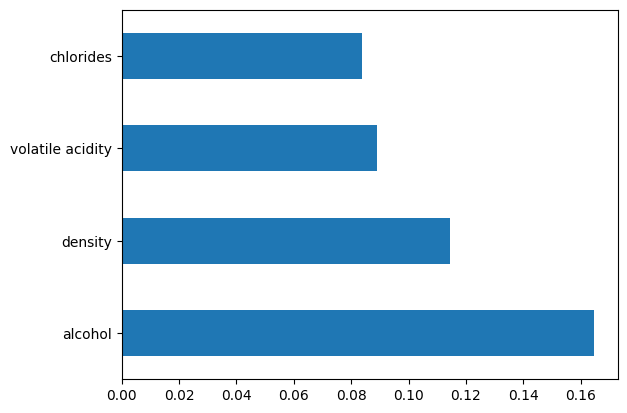

In [ ]:
#Check for feature importance
feature_importances = pd.Series(model.feature_importances_,index =x.columns)
feature_importances.nlargest(4).plot(kind="barh")
plt.show()

In [ ]:
# Selecting the 4 best features for the RandomForestClassifier model
best_features = df_new[["alcohol", "density", "chlorides", "volatile acidity"]]


#### **Train-test split**

In [ ]:
# Splitting the data for the best features
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(best_features, y,
                                                 test_size=0.2, random_state=42)

In [ ]:
# Splitting the data with all features
x_train1,x_test1,y_train1,y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

### **Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Normalizing dataset for the best features
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)

xtrain_normalized = norm_fit.transform(x_train)
xtest_normalized = norm_fit.transform(x_test)

print(xtrain_normalized)



#Normalizing dataset with all features
norm_fit1 = norm.fit(x_train1)

xtrain1_normalized = norm_fit1.transform(x_train1)
xtest1_normalized = norm_fit1.transform(x_test1)

print(xtrain1_normalized)

[[0.40322581 0.12897629 0.03654485 0.10666667]
 [0.70967742 0.1343744  0.13953488 0.13333333]
 [0.61290323 0.12724118 0.09136213 0.42333333]
 ...
 [0.24193548 0.14420667 0.17940199 0.19333333]
 [0.24193548 0.15905147 0.06976744 0.12      ]
 [0.24193548 0.1995373  0.11295681 0.36      ]]
[[0.23728814 0.10666667 0.28455285 ... 0.08426966 0.40322581 1.        ]
 [0.38135593 0.13333333 0.3902439  ... 0.2247191  0.70967742 0.        ]
 [0.33050847 0.42333333 0.00813008 ... 0.19662921 0.61290323 0.        ]
 ...
 [0.22033898 0.19333333 0.16260163 ... 0.11797753 0.24193548 1.        ]
 [0.22881356 0.12       0.40650407 ... 0.14044944 0.24193548 1.        ]
 [0.28813559 0.36       0.04878049 ... 0.17977528 0.24193548 0.        ]]


## **Random Forest Classifier Model**

#### **Training model using subset (best 4 features)**

In [ ]:
model = RandomForestClassifier()

In [ ]:
# Fit data
fit_model = model.fit(xtrain_normalized, y_train)

In [ ]:
# Score
model_score = model.score(xtest_normalized, y_test)
print('Score of model is : ',model_score)

Score of model is :  0.8730769230769231


#### **Testing Prediction Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Predict on the test set
model_predictions = fit_model.predict(xtest_normalized)

# Calculate the accuracy
model_accuracy = accuracy_score(y_test, model_predictions)

# Confusion Matrix
model_confusion = confusion_matrix(y_test, model_predictions)

print(f"Model Accuracy: {model_accuracy * 100:.2f}%")
print("Confusion Matrix:\n", model_confusion)

Model Accuracy: 87.31%
Confusion Matrix:
 [[990  58]
 [107 145]]


#### **Training model using original features**

In [ ]:
#Fit data
fit_model = model.fit(xtrain1_normalized, y_train1)

# Score
model_score1 = model.score(xtest1_normalized, y_test1)

# Predict on the test set
model_predictions1 = fit_model.predict(xtest1_normalized)

# Calculate the accuracy
model_accuracy1 = accuracy_score(y_test1, model_predictions1)

# Confusion Matrix
model_confusion1 = confusion_matrix(y_test1, model_predictions1)

print(f"Model Accuracy: {model_accuracy1 * 100:.2f}%")
print("Confusion Matrix:\n", model_confusion1)

Model Accuracy: 89.00%
Confusion Matrix:
 [[1014   34]
 [ 109  143]]


##### **Accuracy difference between the subset and original features**

The increase in accuracy from 87% when using the best 4 features to 88% when using all features suggests that the additional features provide valuable information for improving the model's predictive performance. Therefore, extra features contain relevant information that contributes positively to the classification task regardless of the correlation scores, capturing patterns in the data that were not captured by the initial subset.

## **Artificial Neural Network (ANN)**

In [ ]:
#Import modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
#Initialize ANN
ann = models.Sequential()

**Creating Hidden Layers**

In [ ]:
#Add First Hidden Layer
ann.add(layers.Dense(units=64, activation='relu'))

#Add Second Hidden Layer
ann.add(layers.Dense(units=32, activation='relu'))

#Add Output Layer
ann.add(layers.Dense(units=1, activation='sigmoid'))


**Compiling Artificial Neural Network**

In [ ]:
#Compile ANN
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Fitting Artificial Neural Network**

In [ ]:
# Fit / Train the model
ann.fit(xtrain_normalized, y_train, epochs=10, batch_size=32)

Epoch 1/10
163/163 [==============================] - 2s 2ms/step - loss: 0.4910 - accuracy: 0.8026
Epoch 2/10
163/163 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8074
Epoch 3/10
163/163 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8082
Epoch 4/10
163/163 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8114
Epoch 5/10
163/163 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8099
Epoch 6/10
163/163 [==============================] - 1s 3ms/step - loss: 0.4060 - accuracy: 0.8087
Epoch 7/10
163/163 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8076
Epoch 8/10
163/163 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8099
Epoch 9/10
163/163 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8084
Epoch 10/10
163/163 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8126

**Evaluating ANN using the Test Set**

In [ ]:
# Evaluate the model on the test set
ann_predictions = ann.predict(xtest_normalized)

# Threshold the predictions to get binary class labels
binary_predictions = (ann_predictions > 0.5).astype(int)

ann_accuracy = accuracy_score(y_test, binary_predictions)
ann_confusion = confusion_matrix(y_test, binary_predictions)

print(f"Accuracy: {ann_accuracy * 100:.2f}%")
print("Confusion Matrix:\n", ann_confusion)

41/41 [==============================] - 0s 1ms/step
Accuracy: 82.00%
Confusion Matrix:
 [[1029   19]
 [ 215   37]]


## **Confusion Matrix Review**

The confusion matrix provides a comprehensive summary of the performance of a classification model by tabulating the actual and predicted classes.

For the Random Forest Classifier:


*   True Positives (TP): 143
*   False Positives (FP): 34
*   True Negatives (TN): 109
*   False Negatives (FN): 105


For the Artificial Neural Network (ANN):


*   True Positives (TP): 37
*   False Positives (FP): 19
*   True Negatives (TN): 1029
*   False Negatives (FN): 215

The observation is that:

The Random Forest Classifier correctly classified 147 instances as high quality wines and 986 instances as low quality wines, but it misclassified 62 instances as high quality wines and 105 instances as low quality wines.

The ANN correctly classified 48 instances as high quality wines and 1018 instances as low quality wines, but it misclassified 30 instances as high quality wines and 204 instances as low quality wines.

## **Conclusion**

Based on the evaluation of the two models, the Random Forest classifier achieved a higher accuracy score of 87% compared to the Artificial Neural Network's accuracy of 80%. This suggests that the Random Forest model performed better in classifying wines as either high or low quality based on the features provided. The higher accuracy of the Random Forest model could be attributed to its ability to handle non-linear relationships and interactions between features effectively. Nonetheless, both models demonstrated a high performance, indicating the potential of machine learning and deep learning approaches in wine quality classification.



A key takeaway from this wine classification project is the importance of feature selection and engineering in model performance. Understanding the relevance of features not only enhances model accuracy but also provides valuable insights into the key determinants of wine quality, contributing to more informed decision-making processes in both the wine industry and consumer markets. Further, normalization is crucial in feature scaling because it standardizes all features on a similar scale. Such improves modeling accuracy by mitigating the influence of varying scales on machine learning models.